In [1]:
pip install palmerpenguins


Note: you may need to restart the kernel to use updated packages.


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import scipy.stats as stats

from palmerpenguins import load_penguins

In [3]:
penguins = sns.load_dataset("penguins")

In [4]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [9]:
# anova from scipy.stats

# Filter out any missing values in the 'bill_length_mm' and 'species' columns
filtered_data = penguins.dropna(subset=['bill_length_mm', 'species'])


In [11]:
#filtered_data.head()

In [16]:

# Extract data for each penguin species
species_groups = [filtered_data[filtered_data['species'] == species]['bill_length_mm'] for species in filtered_data['species'].unique()]
type(species_groups)

list

In [19]:

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(*species_groups)

# Print results
print("F-statistic:", f_statistic)
print("P-value:", p_value)


F-statistic: 410.6002550405077
P-value: 2.6946137388895484e-91


In [18]:

# Interpret the results
alpha = 0.05  # Set your significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in bill lengths among penguin species.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in bill lengths among penguin species.")

Reject the null hypothesis: There is a significant difference in bill lengths among penguin species.


In [24]:
penguins_main = load_penguins()
penguins_main.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [25]:
penguins_main.year.unique()

array([2007, 2008, 2009], dtype=int64)

In [26]:
# interpolate

flipper_length = penguins_main["flipper_length_mm"].values
body_mass = penguins_main["body_mass_g"].values


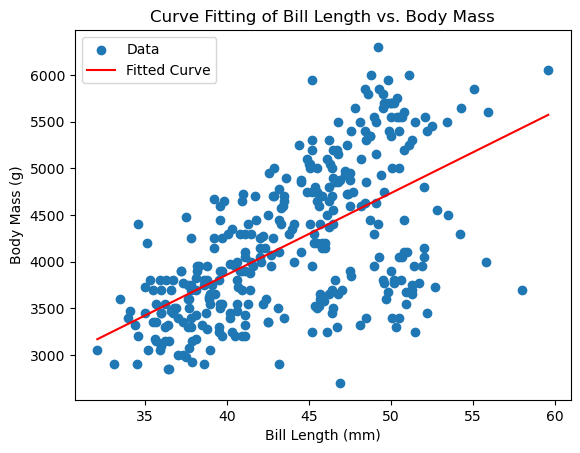

Fitted Parameters:
a (slope): 87.41527681343267
b (intercept): 362.3067321707127


In [33]:
from scipy.optimize import curve_fit

# Filter out any missing values in the 'bill_length_mm' and 'bill_depth_mm' columns
filtered_data = penguins_main.dropna(subset=['bill_length_mm', 'body_mass_g'])

# Define the function to fit (you can choose an appropriate function)
def func(x, a, b):
    return a * x + b

# Extract the data
x_data = filtered_data['bill_length_mm']
y_data = filtered_data['body_mass_g']

# Perform curve fitting
params, covariance = curve_fit(func, x_data, y_data)

# Extract the fitted parameters
a_fit, b_fit = params

# Create a curve using the fitted parameters
x_curve = np.linspace(min(x_data), max(x_data), 100)
y_curve = func(x_curve, a_fit, b_fit)

# Plot the original data and the fitted curve
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_curve, y_curve, 'r', label='Fitted Curve')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Body Mass (g)')
plt.legend()
plt.title('Curve Fitting of Bill Length vs. Body Mass')
plt.show()

# Print the fitted parameters
print("Fitted Parameters:")
print("a (slope):", a_fit)
print("b (intercept):", b_fit)

In [36]:
penguins = sns.load_dataset("penguins")

# Filter out any missing values in the 'bill_length_mm' and 'bill_depth_mm' columns
filtered_data = penguins.dropna(subset=['bill_length_mm', 'body_mass_g'])

# Extract the data for the two variables of interest
x_data = filtered_data['bill_length_mm']
y_data = filtered_data['body_mass_g']

# Calculate Pearson correlation coefficient
pearson_corr, _ = stats.pearsonr(x_data, y_data)

# Calculate Spearman correlation coefficient
spearman_corr, _ = stats.spearmanr(x_data, y_data)

# Print the results
print("Pearson Correlation Coefficient:", pearson_corr)
print("Spearman Correlation Coefficient:", spearman_corr)

Pearson Correlation Coefficient: 0.5951098244376304
Spearman Correlation Coefficient: 0.5838003194455482
